<div align="center">
    <img src="images/logo.png" width="250" height="200">
</div>

<div align="center">
    To download the previously cleaned dataset click <a href="https://drive.google.com/file/d/1mYJws7uPjbPqPszUQHpf4PfrHSEjAVIu/view?usp=sharing" target="__blank">here</a>.
</div>

In [4]:
# import packages
import numpy as np
import pandas as pd

# set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

df = pd.read_pickle('clean_complaints.pkl')

In [9]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,
3379500,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,<NA>,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,<NA>
3255455,2019-05-23,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,<NA>,Company has responded to the consumer and the ...,MIDFIRST BANK,AZ,85254,<NA>,Referral,2019-05-28,Closed with explanation,Yes,<NA>
4267123,2021-04-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,<NA>,<NA>,"EQUIFAX, INC.",PA,19403,<NA>,Web,2021-04-02,Closed with explanation,Yes,<NA>
3446074,2019-11-20,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,<NA>,Company has responded to the consumer and the ...,PENTAGON FEDERAL CREDIT UNION,VA,22304,<NA>,Referral,2019-11-21,Closed with explanation,Yes,<NA>
4239229,2021-03-23,"Money transfer, virtual currency, or money ser...",Foreign currency exchange,Fraud or scam,NaN,<NA>,<NA>,Square Inc.,CA,91387,<NA>,Web,2021-03-23,Closed with explanation,Yes,<NA>


In [11]:
neccesary_df = df[['Company response to consumer','Timely response?', 'Consumer disputed?', 'Company']]
neccesary_df.head(3)

,Company response to consumer,Timely response?,Consumer disputed?,Company
Complaint ID,,,,
3379500,Closed with non-monetary relief,Yes,<NA>,Experian Information Solutions Inc.
3255455,Closed with explanation,Yes,<NA>,MIDFIRST BANK
4267123,Closed with explanation,Yes,<NA>,"EQUIFAX, INC."


In [102]:
company_ratings = pd.DataFrame(
    {'Company Name': neccesary_df['Company'].unique().tolist(),
     'Rating': 0})

company_ratings.set_index('Company Name', inplace=True)

# initial ratings for each unique company
company_ratings.head()

,Rating
Company Name,
Experian Information Solutions Inc.,0
MIDFIRST BANK,0
"EQUIFAX, INC.",0
PENTAGON FEDERAL CREDIT UNION,0
Square Inc.,0


In [110]:
def rating(company_name):
    company_df = df[df['Company'] == company_name]
    complaints = company_df.shape[0] # -0.5
    timely_responses = company_df[company_df['Timely response?'] == 'Yes'].shape[0] # 0.5
    non_timely_responses = complaints - timely_responses # -1
    
    responses = company_df['Company response to consumer'].dropna().tolist()
    
    non_monetary_relief = responses.count('Closed with non-monetary relief') # 1
    monetary_relief = responses.count('Closed with monetary relief') # 1
    untimely_response = responses.count('Untimely response') # -1
    relief = responses.count('Closed with relief') # 0.5
    explanation = responses.count('Closed with explanation') # -0.5
    in_progress = responses.count('In progress') # no value
    closed = responses.count('Closed') # no value
    no_relief = responses.count('Closed without relief') # -0.5
        
    consumer_disputes = company_df[company_df['Consumer disputed?'] == 'Yes'].shape[0] # -1
    
    rating = - 0.5 * complaints + 0.5 * timely_responses - 1 * non_timely_responses
    rating += 1 * non_monetary_relief + 1 * monetary_relief - 1 * untimely_response + 0.5 * relief - 0.5 * explanation - 0.5 * no_relief
    rating -= consumer_disputes
    
    return rating

In [111]:
for company, row in company_ratings.iterrows():
    company_ratings.at[company, 'Rating'] = rating(company)

In [118]:
company_ratings.dtypes

Rating    float64
dtype: object

In [120]:
from sklearn import preprocessing

x = company_ratings

print(x)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df.head()

                                      Rating
Company Name                                
Experian Information Solutions Inc. -12375.5
MIDFIRST BANK                          -75.0
EQUIFAX, INC.                       -48771.0
PENTAGON FEDERAL CREDIT UNION         -196.0
Square Inc.                           -344.0
...                                      ...
Mathew Aaron Holdings Inc.               1.0
Pando Mortgage, LLC                     -0.5
Square One Financial, LLC               -0.5
Cash Security, Inc.                     -0.5
Rating                                   0.0

[4854 rows x 1 columns]


,0
0,0.746550
1,0.985160
2,0.040533
3,0.982813
4,0.979942


In [123]:
company_ratings['normalized'] = x_scaled * 100

company_ratings.head()

,Rating,normalized
Company Name,,
Experian Information Solutions Inc.,-12375.5,74.654950
MIDFIRST BANK,-75.0,98.516018
"EQUIFAX, INC.",-48771.0,4.053307
PENTAGON FEDERAL CREDIT UNION,-196.0,98.281297
Square Inc.,-344.0,97.994200


In [128]:
company_ratings.sort_values(by=['normalized'], ascending=False, inplace=True)
company_ratings.head(10)

,Rating,normalized
Company Name,,
IQOR US INC,690.0,100.000000
"Capio Partners, LLC",420.0,99.476242
"The CMI Group, Inc.",377.0,99.392828
CL Holdings LLC,313.0,99.268678
"Empowerment Ventures, LLC",250.0,99.146468
"Dynamic Recovery Solutions, LLC",212.5,99.073724
The Law Offices of Mitchell D. Bluhm & Associates,158.5,98.968972
"Paypal Holdings, Inc",122.5,98.899138
"Windham Professionals, Inc.",120.5,98.895258


In [129]:
company_ratings.tail(10)

,Rating,normalized
Company Name,,
"Navient Solutions, LLC.",-6803.0,85.464738
"CITIBANK, N.A.",-7820.5,83.490946
NATIONSTAR MORTGAGE,-8740.5,81.706288
Experian Information Solutions Inc.,-12375.5,74.654950
Ocwen Financial Corporation,-12427.5,74.554078
JPMORGAN CHASE & CO.,-16222.5,67.192365
"BANK OF AMERICA, NATIONAL ASSOCIATION",-19060.5,61.687084
WELLS FARGO & COMPANY,-23906.5,52.286593
"EQUIFAX, INC.",-48771.0,4.053307


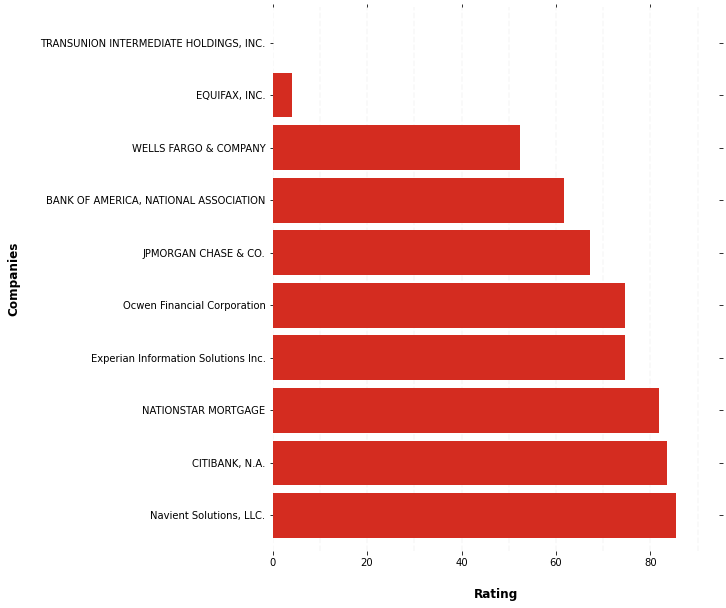

In [140]:
# build a horizontal bar chart for top companies with most complaints
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = company_ratings['normalized'].tail(10).plot(kind='barh', figsize=(8, 10), color='#d42c20', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Rating", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Companies", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.figure.savefig('worst_companies.png')